<a href="https://colab.research.google.com/github/CGS2002/IIIT-AIML/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [112]:
dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
dataset.target = dataset.target.astype(np.int) # so that we can classify
print(dataset.data.shape)
print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-112-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [113]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [114]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [115]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [116]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [117]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [118]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [119]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [120]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [121]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


In [122]:
traindata1, trainlabel1, valdata1, vallabel1 = split(alltraindata, alltrainlabel, 60/100)
valpred1 = NN(traindata1, trainlabel1, valdata1)
valAccuracy1 = Accuracy(vallabel1, valpred1)
print("Validation accuracy of nearest neighbour is ", valAccuracy1)

Validation accuracy of nearest neighbour is  0.33398496240601505


In [123]:
traindata1, trainlabel1, valdata1, vallabel1 = split(alltraindata, alltrainlabel, 80/100)
valpred1 = NN(traindata1, trainlabel1, valdata1)
valAccuracy1 = Accuracy(vallabel1, valpred1)
print("Validation accuracy of nearest neighbour is ", valAccuracy1)

Validation accuracy of nearest neighbour is  0.33763440860215055


In [124]:
traindata1, trainlabel1, valdata1, vallabel1 = split(alltraindata, alltrainlabel, 90/100)
valpred1 = NN(traindata1, trainlabel1, valdata1)
valAccuracy1 = Accuracy(vallabel1, valpred1)
print("Validation accuracy of nearest neighbour is ", valAccuracy1)

Validation accuracy of nearest neighbour is  0.34474474474474476


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [125]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

**Ans 1:-**  Increasing  the validation set  may force a model to be trained on smaller data leading to underfitting (high Bias)


Increasing  the validation set  may  result in a  model  to be trained on larger data leading to overfitting (high Variance)

In [126]:



traindata2, trainlabel2, valdata2, vallabel2 = split(alltraindata, alltrainlabel, 80/100)
valpred2 = NN(traindata2, trainlabel2, valdata2)
valAccuracy2 = Accuracy(vallabel2, valpred2)
print("Validation accuracy of nearest neighbour  with 80 20 split is ", valAccuracy2)

valpredr2 = RandomClassifier(traindata2, trainlabel2, valdata2)
valAccuracyr2 =  Accuracy(vallabel2, valpredr2)
print("Validation accuracy of Random classifier  with 80 20 split is ", valAccuracyr2)


traindata3, trainlabel3, valdata3, vallabel3 = split(alltraindata, alltrainlabel, 90/100)
valpred3 = NN(traindata3, trainlabel3, valdata3)
valAccuracy3 = Accuracy(vallabel3, valpred3)
print("Validation accuracy of nearest neighbour  with 90 10 split is ", valAccuracy3)


valpredr3 = RandomClassifier(traindata3, trainlabel3, valdata3)
valAccuracyr3 =  Accuracy(vallabel3, valpredr3)
print("Validation accuracy of Random classifier  with 90 10  split is ", valAccuracyr3)


traindata4, trainlabel4, valdata4, vallabel4 = split(alltraindata, alltrainlabel, 95/100)
valpred4 = NN(traindata4, trainlabel4, valdata4)
valAccuracy4 = Accuracy(vallabel4, valpred4)
print("Validation accuracy of nearest neighbour  with 95 05 split is ", valAccuracy4)


valpredr4 = RandomClassifier(traindata4, trainlabel4, valdata4)
valAccuracyr4 =  Accuracy(vallabel4, valpredr4)
print("Validation accuracy of Random classifier  with 95 05 split is ", valAccuracyr4)



traindata6, trainlabel6, valdata6, vallabel6 = split(alltraindata, alltrainlabel, 70/100)
valpred6 = NN(traindata6, trainlabel6, valdata6)
valAccuracy6 = Accuracy(vallabel6, valpred6)
print("Validation accuracy of nearest neighbour  with 70 30 split is ", valAccuracy6)

valpredr6 = RandomClassifier(traindata6, trainlabel6, valdata6)
valAccuracyr6 =  Accuracy(vallabel6, valpredr6)
print("Validation accuracy of Random classifier  with 70 30 split is ", valAccuracyr6)


traindata5, trainlabel5, valdata5, vallabel5 = split(alltraindata, alltrainlabel,60/100)
valpred5 = NN(traindata5, trainlabel5, valdata5)
valAccuracy5 = Accuracy(vallabel5, valpred5)
print("Validation accuracy of nearest neighbour  with 60 40 split is ", valAccuracy5)


valpredr5 = RandomClassifier(traindata5, trainlabel5, valdata5)
valAccuracyr5 =  Accuracy(vallabel5, valpredr5)
print("Validation accuracy of Random classifier  with 60 40 split is ", valAccuracyr5)



traindata7, trainlabel7, valdata7, vallabel7 = split(alltraindata, alltrainlabel, 50/100)
valpred7 = NN(traindata7, trainlabel7, valdata7)
valAccuracy7 = Accuracy(vallabel7, valpred7)
print("Validation accuracy of nearest neighbour  with 50 50 split is ", valAccuracy7)

valpredr7 = RandomClassifier(traindata7, trainlabel7, valdata7)
valAccuracyr7 =  Accuracy(vallabel7, valpredr7)
print("Validation accuracy of Random classifier  with 50 50 split is ", valAccuracyr7)


traindata8, trainlabel8, valdata8, vallabel8 = split(alltraindata, alltrainlabel, 99.9/100)
valpred8 = NN(traindata8, trainlabel8, valdata8)
valAccuracy8 = Accuracy(vallabel8, valpred8)
print("Validation accuracy of nearest neighbour  with 99.9 0.1 split is ", valAccuracy8)


valpredr8 = RandomClassifier(traindata8, trainlabel8, valdata8)
valAccuracyr8 =  Accuracy(vallabel8, valpredr8)
print("Validation accuracy of Random classifier  with 99.9 0.1  split is ", valAccuracyr8)



traindata9, trainlabel9, valdata9, vallabel9 = split(alltraindata, alltrainlabel, 0.1/100)
valpred9 = NN(traindata9, trainlabel9, valdata9)
valAccuracy9 = Accuracy(vallabel9, valpred9)
print("Validation accuracy of nearest neighbour  with 0.1 99.9 split is ", valAccuracy9)


valpredr9 = RandomClassifier(traindata9, trainlabel9, valdata9)
valAccuracyr9 =  Accuracy(vallabel9, valpredr9)
print("Validation accuracy of Random classifier  with 0.1 99.9 split is ", valAccuracyr9)




Validation accuracy of nearest neighbour  with 80 20 split is  0.33853688399142945
Validation accuracy of Random classifier  with 80 20 split is  0.16406489133761862
Validation accuracy of nearest neighbour  with 90 10 split is  0.359211337030191
Validation accuracy of Random classifier  with 90 10  split is  0.19593345656192238
Validation accuracy of nearest neighbour  with 95 05 split is  0.37456242707117854
Validation accuracy of Random classifier  with 95 05 split is  0.14002333722287047
Validation accuracy of nearest neighbour  with 70 30 split is  0.33747993579454255
Validation accuracy of Random classifier  with 70 30 split is  0.17014446227929375
Validation accuracy of nearest neighbour  with 60 40 split is  0.3332818771225687
Validation accuracy of Random classifier  with 60 40 split is  0.17026860142019143
Validation accuracy of nearest neighbour  with 50 50 split is  0.3281793119980822
Validation accuracy of Random classifier  with 50 50 split is  0.16852451156658277
Validat

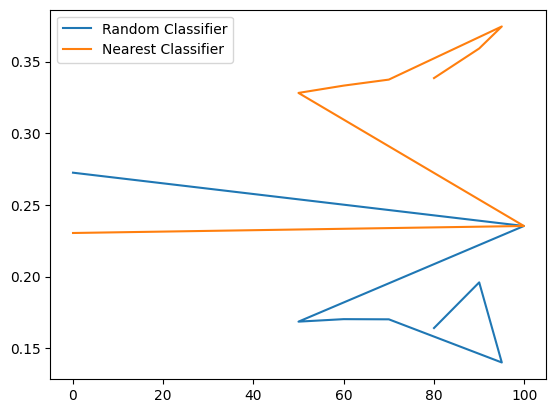

In [127]:
import matplotlib.pyplot as plt

X= np.array([80,90,95,70,60,50,99.9,0.1])

Y1= np.array([valAccuracyr2,valAccuracyr3,valAccuracyr4,valAccuracyr6,valAccuracyr5,valAccuracyr7],dtype='float')
Y1= np.array([valAccuracyr2,valAccuracyr3,valAccuracyr4,valAccuracyr6,valAccuracyr5,valAccuracyr7,valAccuracyr8,valAccuracyr9],dtype='float')
Y2=np.array([valAccuracy2,valAccuracy3,valAccuracy4,valAccuracy6,valAccuracy5,valAccuracy7,valAccuracy8,valAccuracy9],dtype='float')
plt.plot(X, Y1,label = "Random Classifier")
plt.plot(X, Y2,label = "Nearest Classifier")

plt.legend()
plt.show()

**Ans 2:-** Size of the data is important factor as more data or less data effects the models accuracy there by leading to underfitting (model finds an overly generalized surface ) , where as using small split may cause it to overfit leading to errors while predicting on unseen data

**Ans 3:-** The splitting criteria depends on the size of data and problem underconsideration when looking at static validation set 80-20 will be optimal split , Where as using k fold cross validation would yeild better results  

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [128]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [129]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3413843633486969
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**Ans 1** Yes ,averaging the validation accuracy across multiple splits gives more consistent results.

**Ans 2** Yes ,averaging the validation accuracy across multiple splits gives almost same accuracy as test accuracy

**Ans 3**  Increases the estimate of accuracy, but needs more computational power

**Ans 4**  Increasing the Iterations does have limitations like predicting variable perforamce measure i.e accuracy predicted will be significantly different from test

In [130]:
a1= AverageAccuracy(alltraindata, alltrainlabel, 70/100, 10, classifier=NN)
a2= AverageAccuracy(alltraindata, alltrainlabel, 80/100, 10, classifier=NN)
a3= AverageAccuracy(alltraindata, alltrainlabel, 60/100, 10, classifier=NN)
a4= AverageAccuracy(alltraindata, alltrainlabel, 95/100, 10, classifier=NN)
a5 = np.array([a1,a2,a3,a4]).mean()
print('Average validation accuracy is ', a5)
testpred = NN(alltraindata, alltrainlabel, testdata)
a=Accuracy(testlabel, testpred)
print('test accuracy is ',Accuracy(testlabel, testpred))

Average validation accuracy is  0.34079848636436666
test accuracy is  0.34917953667953666


In [133]:
for i in range(10,80,10):
  print(f'Average validation accuracy  with iterations {i} is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))


Average validation accuracy  with iterations 10 is  0.33986318569356894
Average validation accuracy  with iterations 20 is  0.3420398032022499
Average validation accuracy  with iterations 30 is  0.339982718078262
Average validation accuracy  with iterations 40 is  0.34060185195965625
Average validation accuracy  with iterations 50 is  0.339236095224372
Average validation accuracy  with iterations 60 is  0.3403241101240248
Average validation accuracy  with iterations 70 is  0.3396176106205592
